In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
base_dir = "/home/aldec/data/random_stuff/KaggleFun/HealthAnalytics"
df = pd.read_csv(os.path.join(base_dir,"train_data.csv"))
df.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
case_id                              318438 non-null int64
Hospital_code                        318438 non-null int64
Hospital_type_code                   318438 non-null object
City_Code_Hospital                   318438 non-null int64
Hospital_region_code                 318438 non-null object
Available Extra Rooms in Hospital    318438 non-null int64
Department                           318438 non-null object
Ward_Type                            318438 non-null object
Ward_Facility_Code                   318438 non-null object
Bed Grade                            318325 non-null float64
patientid                            318438 non-null int64
City_Code_Patient                    313906 non-null float64
Type of Admission                    318438 non-null object
Severity of Illness                  318438 non-null object
Visitors with Patient                318438 non-null

From this, we can see that Bed Grade, City_Code_Patient are missing data. But first, let's remove data that's definitely not important. For Bed Grade, we can replace na with the median bed grade

In [2]:
df = df.drop(["patientid", "case_id", "Hospital_code"], axis=1)
df["Bed Grade"].fillna(df["Bed Grade"].median(), inplace=True)
df.head()

,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,b,2,Y,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [5]:
df_mod = df.copy()

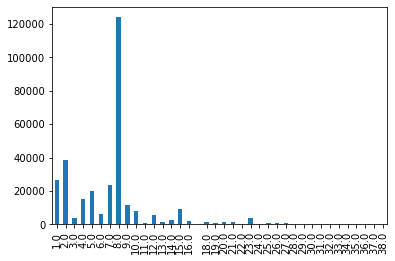

In [6]:
df["City_Code_Patient"].value_counts().plot.bar()

In [7]:
df_mod["City_Code_Patient"].fillna(value=8.0, inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = LabelEncoder()
cats = ["Hospital_type_code","Hospital_region_code","Department", "Ward_Type", "Ward_Facility_Code", "Type of Admission", "Stay"]
other_cats = ["Severity of Illness", "Age"]

cats_dict_oh = dict()
cats_dict_en = dict()

for cat in cats:
    temp_cat = df[cat]
    encoder = LabelEncoder()
    temp_cat_en = encoder.fit_transform(temp_cat)
    cats_dict_oh[cat] = temp_cat_en
    df_mod[cat] = temp_cat_en
    oh = OneHotEncoder()
    temp_cat_oh = oh.fit_transform(temp_cat_en.reshape(-1,1))
    cats_dict_oh[cat] = temp_cat_oh.toarray()
    print(encoder.classes_)
    
df_mod.head()

['a' 'b' 'c' 'd' 'e' 'f' 'g']
['X' 'Y' 'Z']
['TB & Chest disease' 'anesthesia' 'gynecology' 'radiotherapy' 'surgery']
['P' 'Q' 'R' 'S' 'T' 'U']
['A' 'B' 'C' 'D' 'E' 'F']
['Emergency' 'Trauma' 'Urgent']
['0-10' '11-20' '21-30' '31-40' '41-50' '51-60' '61-70' '71-80' '81-90'
 '91-100' 'More than 100 Days']


,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,2,3,2,3,3,2,5,2.0,7.0,0,Extreme,2,51-60,4911.0,0
1,2,5,2,2,3,3,5,2.0,7.0,1,Extreme,2,51-60,5954.0,4
2,4,1,0,2,1,3,4,2.0,7.0,1,Extreme,2,51-60,4745.0,3
3,1,2,1,2,3,2,3,2.0,7.0,1,Extreme,2,51-60,7272.0,4
4,1,2,1,2,3,3,3,2.0,7.0,1,Extreme,2,51-60,5558.0,4


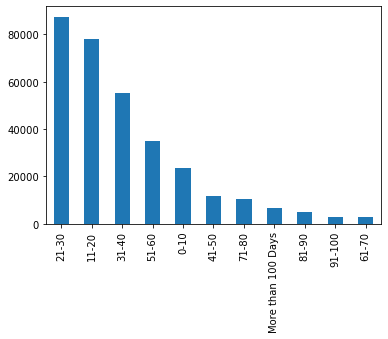

In [9]:
df.Stay.value_counts().plot.bar()

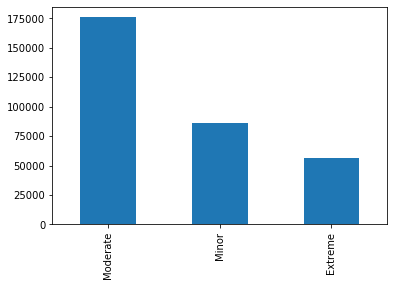

In [10]:
df["Severity of Illness"].value_counts().plot.bar()
plt.show()

In [11]:
df_mod["Severity of Illness"] = df_mod["Severity of Illness"].replace(["Moderate", "Minor", "Extreme"], [1,0,2])

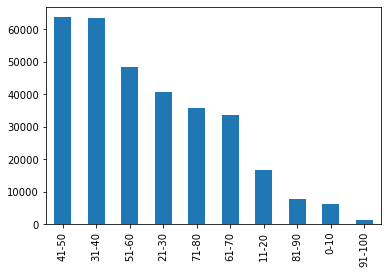

In [12]:
df["Age"].value_counts().plot.bar()
plt.show()

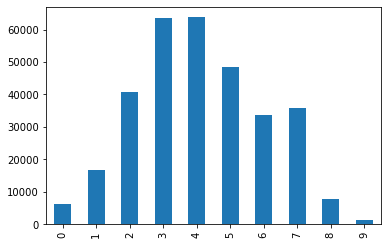

In [13]:
df_mod["Age"] = df_mod["Age"].replace(["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"], 
                                      [0,1,2,3,4,5,6,7,8,9])
df_mod["Age"].value_counts().plot.bar()
plt.show()

In [14]:
df_mod.head()

,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,2,3,2,3,3,2,5,2.0,7.0,0,2,2,5,4911.0,0
1,2,5,2,2,3,3,5,2.0,7.0,1,2,2,5,5954.0,4
2,4,1,0,2,1,3,4,2.0,7.0,1,2,2,5,4745.0,3
3,1,2,1,2,3,2,3,2.0,7.0,1,2,2,5,7272.0,4
4,1,2,1,2,3,3,3,2.0,7.0,1,2,2,5,5558.0,4


In [15]:
df_mod.isna().sum()

Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [16]:
corr = df_mod.corr()
corr["Stay"].sort_values(ascending=False)

Stay                                 1.000000
Visitors with Patient                0.537537
Ward_Type                            0.185191
Severity of Illness                  0.126160
Age                                  0.094163
Hospital_type_code                   0.058592
Department                           0.033287
Bed Grade                            0.025761
Type of Admission                    0.023617
Hospital_region_code                 0.011905
City_Code_Hospital                   0.006381
Ward_Facility_Code                  -0.004552
City_Code_Patient                   -0.009447
Admission_Deposit                   -0.052077
Available Extra Rooms in Hospital   -0.121120
Name: Stay, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split as split
train, test = split(df_mod, test_size=0.2, random_state=42)

In [18]:
train.to_csv(os.path.join(base_dir, "pro_train.csv"))
test.to_csv(os.path.join(base_dir, "pro_test.csv"))

Ignore the cells below

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

num_attribs = ["Available Extra Rooms in Hospital", "Bed Grade", "Visitors with Patient", "Admission_Deposit"]
cat_attribs = ["Hospital_type_code", "City_Code_Hospital", "Hospital_region_code", "Department", "Ward_Type", "Ward_Facility_Code", "City_Code_Patient", "Type of Admission"]

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attrs):
        self.attrs = attrs
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attrs].values

num_pipe = Pipeline([
    ("selector", DataFrameSelector(num_attribs))
    ("imputer", Imputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

cat_pipe = Pipeline([
    ("selector", DataFrameSelector(cat_attribs))
    ("imputer", Imputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

In [4]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


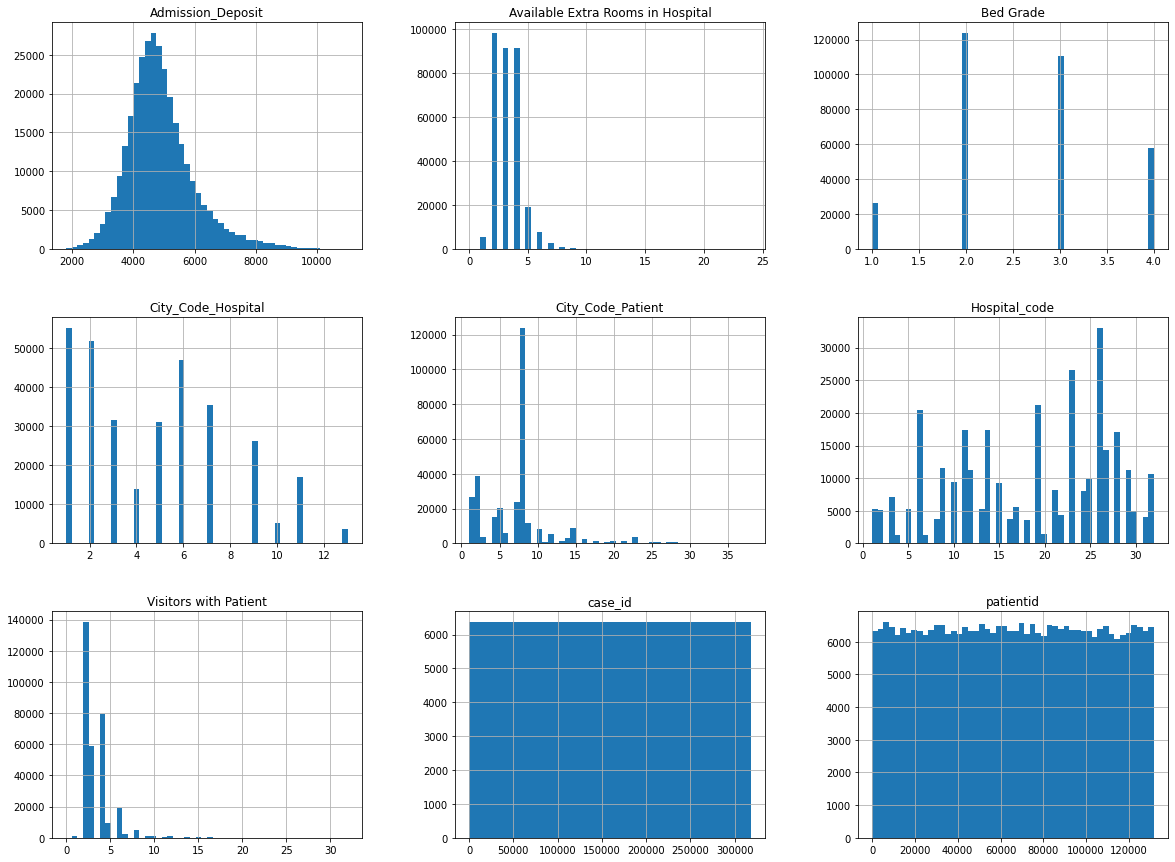

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

C:\Users\alvan_li\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\alvan_li\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


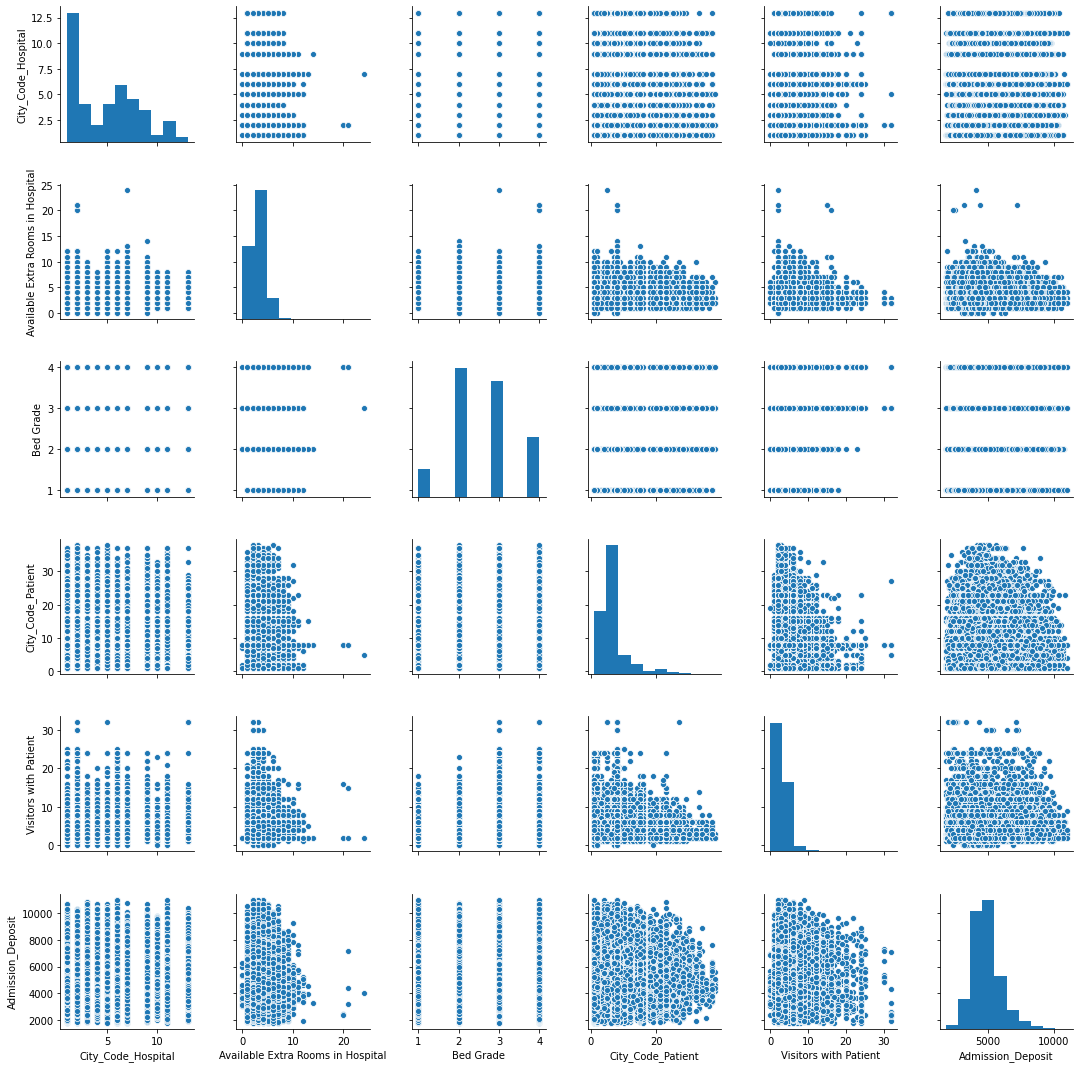

In [11]:
import seaborn as sns
sns.pairplot(df)